# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

# Reading the dataset

In [2]:
books_df=pd.read_csv('books.csv')
books_df.head()

,book_id,avg_rating,no_of_ratings,user_id,user_rating
0,4833,4.25,7156.0,3466,0
1,590,4.31,7821.0,3466,5
2,4264,4.08,3836.0,3453,5
3,3361,3.52,1245.0,3453,4
4,4535,4.13,3107.0,3453,0


In [3]:
listing_df=pd.read_csv('listing.csv', encoding = 'latin-1')
listing_df.head()

,book_id,genre,name,author
0,4833,Biographies & Memoirs,The Glass Castle,Jeannette Walls
1,590,Biographies & Memoirs,"Night (The Night Trilogy, #1)",Elie Wiesel
2,4264,Biographies & Memoirs,"Angela's Ashes (Frank McCourt, #1)",Frank McCourt
3,3361,Biographies & Memoirs,"Eat, Pray, Love",Elizabeth Gilbert
4,4535,Biographies & Memoirs,Into Thin Air: A Personal Account of the Mount...,Jon Krakauer


In [4]:
description_df=pd.read_csv('description.csv', encoding = 'latin-1')
description_df.head()

,book_id,name,description
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...


# Exploratory Data Analysis

In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 5 columns):
book_id          2312 non-null int64
avg_rating       2310 non-null float64
no_of_ratings    2310 non-null float64
user_id          2312 non-null int64
user_rating      2312 non-null int64
dtypes: float64(2), int64(3)
memory usage: 90.4 KB


In [6]:
books_df['avg_rating'] = books_df['avg_rating'].fillna(books_df['avg_rating'].median())
books_df['no_of_ratings'] = books_df['no_of_ratings'].fillna(books_df['no_of_ratings'].median())

In [7]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 4 columns):
book_id    1089 non-null int64
genre      1089 non-null object
name       1087 non-null object
author     1011 non-null object
dtypes: int64(1), object(3)
memory usage: 21.3+ KB


In [8]:
description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
book_id        136 non-null float64
name           123 non-null object
description    122 non-null object
dtypes: float64(1), object(2)
memory usage: 2.3+ KB


In [9]:
books_df.describe().T

,count,mean,std,min,25%,50%,75%,max
book_id,2312.0,2515.098616,1453.933954,6.0,1257.0,2610.0,3729.00,4999.0
avg_rating,2312.0,3.867141,1.010137,0.0,3.0,4.0,4.73,5.0
no_of_ratings,2312.0,2144.584343,2745.310443,0.0,101.0,660.5,3608.00,9936.0
user_id,2312.0,3108.624135,1111.356799,117.0,3221.0,3471.0,3476.00,7131.0
user_rating,2312.0,2.792820,1.562177,0.0,2.0,3.0,4.00,5.0


In [10]:
print('Books')
print('Shape=',books_df.shape)
print('Column name:',end=' ')
print(list(books_df.columns))

Books
Shape= (2312, 5)
Column name: ['book_id', 'avg_rating', 'no_of_ratings', 'user_id', 'user_rating']


In [11]:
print('Listing')
print('Shape=',listing_df.shape)
print('Column name:',end=' ')
print(list(listing_df.columns))

Listing
Shape= (1089, 4)
Column name: ['book_id', 'genre', 'name', 'author']


In [12]:
print('Description')
print('Shape=',description_df.shape)
print('Column name:',end=' ')
print(list(description_df.columns))

Description
Shape= (143, 3)
Column name: ['book_id', 'name', 'description']


In [13]:
books_df['user_rating'].value_counts()

3    449
2    443
4    428
5    425
1    387
0    180
Name: user_rating, dtype: int64

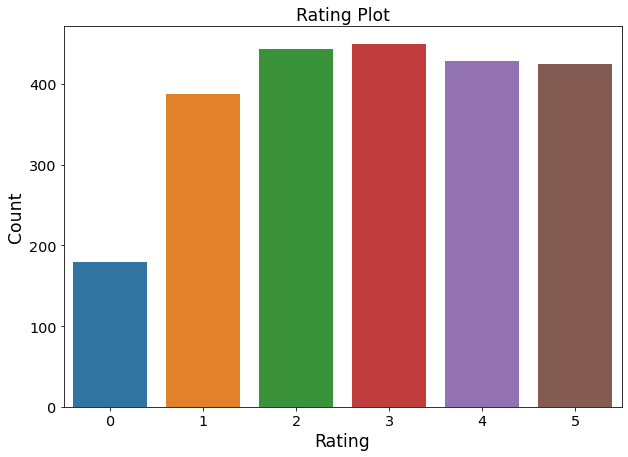

In [14]:
rcParams['figure.figsize']=10,7
sns.countplot(x='user_rating', data=books_df)
plt.title('Rating Plot',fontsize='xx-large')
plt.xlabel('Rating',fontsize='xx-large')
plt.ylabel('Count',fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.show()

##### Inference:
From the above graph, we can infer that most of the users has given ratings as 1, 2, 3, 4 and 5 to different books.

In [15]:
avg_count=pd.DataFrame(books_df['avg_rating'].value_counts())
avg_count

,avg_rating
4.00,750
5.00,560
3.00,409
2.00,104
0.00,48
1.00,20
3.67,17
3.95,15
3.50,13
4.22,12


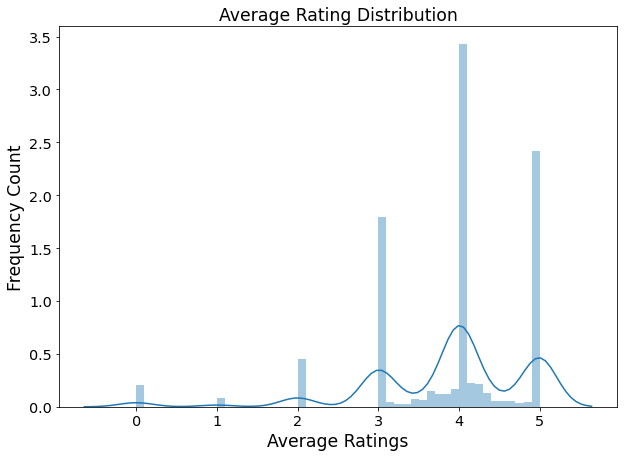

In [16]:
rcParams['figure.figsize']=10,7
sns.distplot(books_df['avg_rating'],bins=50)
plt.title('Average Rating Distribution',fontsize='xx-large')
plt.xlabel('Average Ratings',fontsize='xx-large')
plt.ylabel('Frequency Count',fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.show()

In [17]:
listing_df['genre'].value_counts()

Travel                          90
Business & Money                77
Children's Books                64
Arts & Photography              61
Health, Fitness & Dieting       58
Medical Books                   57
Biographies & Memoirs           52
Crafts, Hobbies & Home          47
Science & Math                  47
Christian Books & Bibles        44
Cookbooks, Food & Wine          40
Computers & Technology          39
Religion & Spirituality         38
Teen & Young Adult              38
Literature & Fiction            37
History                         33
Law                             32
Humor & Entertainment           32
Sports & Outdoors               31
Romance                         23
Science Fiction & Fantasy       21
Politics & Social Sciences      19
Reference                       17
Self-Help                       15
Comics & Graphic Novels         15
Test Preparation                14
Engineering & Transportation    13
Parenting & Relationships       13
Calendars           

### Inference:
Most of the books average ratings lies between 3-5, i.e., most of the books are rated between 3-5.

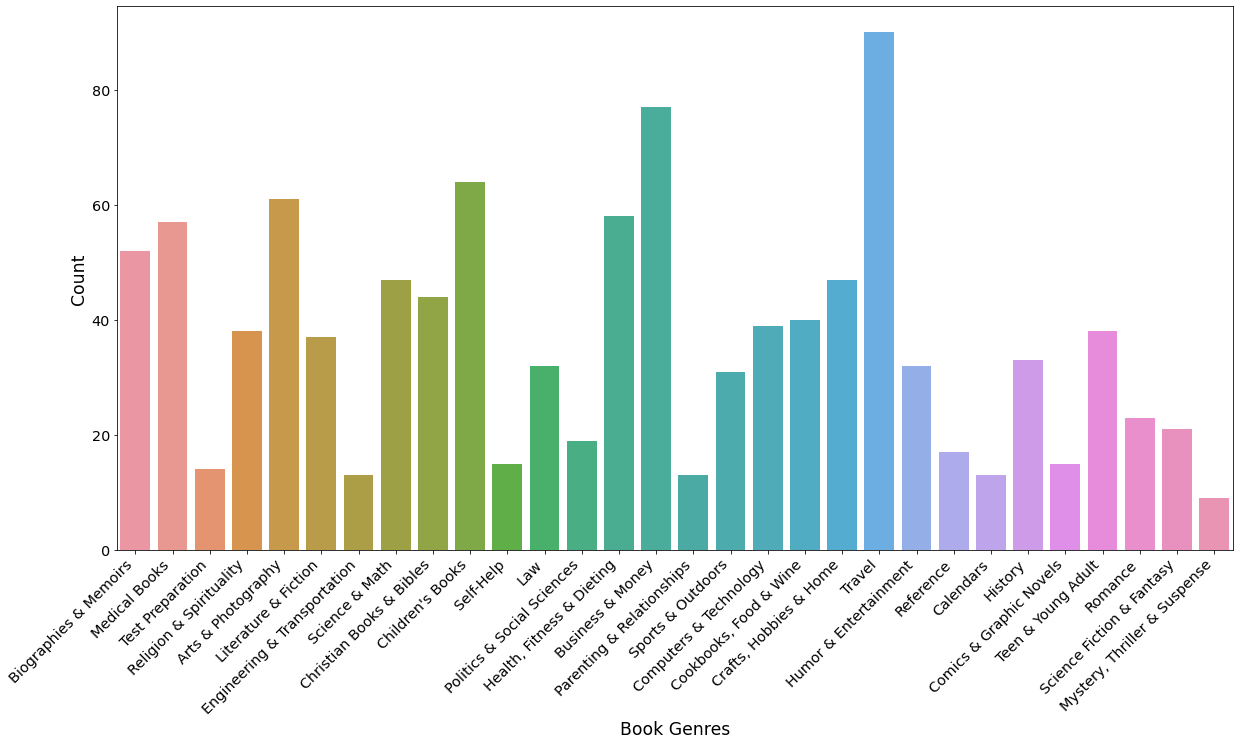

In [18]:
rcParams['figure.figsize']=20,10
sns.countplot(x='genre', data=listing_df)
plt.xlabel('Book Genres',fontsize='xx-large')
plt.ylabel('Count',fontsize='xx-large')
plt.xticks(rotation=45,horizontalalignment='right',fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.show()

# 1. Recommendation Based on Popularity

In [19]:
most_rated_books=books_df.sort_values('no_of_ratings', ascending=False)
most_rated_books=most_rated_books[['book_id','no_of_ratings']].drop_duplicates()
most_rated_books.head(10)

,book_id,no_of_ratings
529,4755,9936.0
1085,2409,9768.0
475,4696,9754.0
194,2194,9754.0
1091,722,9542.0
2072,1616,9542.0
715,3004,9533.0
2071,3073,9533.0
2222,2240,9460.0
1635,433,9451.0


In [20]:
most_rated_books_recommend = pd.merge(most_rated_books, listing_df, on='book_id')
most_rated_books_recommend.head(10)

,book_id,no_of_ratings,genre,name,author
0,4755,9936.0,Law,One Man Out: Curt Flood versus Baseball (Landm...,Robert M. Goldman
1,2409,9768.0,History,In Defense of History,Richard J. Evans
2,4696,9754.0,"Crafts, Hobbies & Home",Mosaic Basics: Everything You Need to Know to ...,Teresa Mills
3,2194,9754.0,Test Preparation,CLEP Micro & Macro Economics Examinations Esse...,ExamREVIEW
4,722,9542.0,Law,Water Resource Management: A Casebook in Law a...,A. Dan Tarlock
5,1616,9542.0,Arts & Photography,The Art of The Incredibles,Mark Cotta Vaz
6,3004,9533.0,"Crafts, Hobbies & Home",Making Jewelry from Polymer Clay,Sophie Arzalier
7,3073,9533.0,History,The Ashgate Research Companion to the Korean War,NaN
8,2240,9460.0,Medical Books,Research Methods in Applied Behavior Analysis,Jon S. Bailey
9,433,9451.0,Literature & Fiction,The Best American Essays of the Century (The B...,NaN


### Inference:
The above books are recommended on the basis of there number of ratings given by the users.

The book which have more rating count is recommended first.

In [21]:
average_ratings=books_df[['book_id','avg_rating','no_of_ratings']]
average_ratings

,book_id,avg_rating,no_of_ratings
0,4833,4.25,7156.0
1,590,4.31,7821.0
2,4264,4.08,3836.0
3,3361,3.52,1245.0
4,4535,4.13,3107.0
5,518,4.08,6250.0
6,3781,3.71,3182.0
7,3190,3.96,7275.0
8,3147,4.20,3148.0
9,225,4.09,3957.0


In [22]:
average_ratings.sort_values('no_of_ratings', ascending=False).drop_duplicates().head(10)

,book_id,avg_rating,no_of_ratings
529,4755,3.00,9936.0
1085,2409,3.00,9768.0
475,4696,5.00,9754.0
194,2194,4.22,9754.0
1091,722,2.00,9542.0
2072,1616,2.00,9542.0
715,3004,4.00,9533.0
2071,3073,2.00,9533.0
2222,2240,4.00,9460.0
1635,433,3.76,9451.0


### Inference:
In this data set, the book that received the most rating counts was not highly rated at all. 

As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

# --------------------------------------------------------------------------------------------------------------

# 2. Recommendations based on Correlation
We use Pearson correlation coefficient to measure the linear correlation between two variables, i.e., the ratings for two books.

As we have found the average rating and the number of ratings each book received, we will use 'average_ratings' dataframe to proceed further.

In [23]:
books_df.head()

,book_id,avg_rating,no_of_ratings,user_id,user_rating
0,4833,4.25,7156.0,3466,0
1,590,4.31,7821.0,3466,5
2,4264,4.08,3836.0,3453,5
3,3361,3.52,1245.0,3453,4
4,4535,4.13,3107.0,3453,0


### Rating matrix
We convert the 'books_df' table to a 2D matrix by selecting particular columns from it. The matrix will be sparse because not every user rated every book.

In [24]:
ratings_pivot = books_df.pivot_table(index='user_id', columns='book_id', values='user_rating')
user_id = ratings_pivot.index       # --> Taking 'user_id' as the index.
book_id = ratings_pivot.columns     # --> Taking 'book_id' as the column.
ratings_pivot.head(10)

book_id,6,7,9,15,21,29,43,45,47,61,...,4931,4941,4942,4968,4971,4975,4978,4991,4995,4999
user_id,,,,,,,,,,,,,,,,,,,,,
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Inference:
The 'ratings_pivot' dataframe shows NaN values for most of the rows and columns. NaN values means that the users have not given any rating to the books.

In [25]:
print('Shape of ratings_pivot=',ratings_pivot.shape)

Shape of ratings_pivot= (190, 710)


In [26]:
select_ratings = ratings_pivot[4755]      # --> selecting the book having highest rating count.
similar_to_select = ratings_pivot.corrwith(select_ratings, method='pearson')  # --> checking correlation with the selected book.
similar_to_select

book_id
6            NaN
7            NaN
9      -0.981981
15           NaN
21           NaN
29           NaN
43           NaN
45           NaN
47           NaN
61           NaN
72           NaN
74           NaN
81           NaN
84           NaN
89           NaN
90           NaN
91           NaN
93           NaN
99           NaN
104          NaN
107          NaN
110          NaN
119          NaN
130          NaN
144          NaN
145          NaN
149          NaN
152          NaN
154          NaN
189          NaN
          ...   
4845    0.500000
4852         NaN
4853         NaN
4854    1.000000
4864         NaN
4868         NaN
4881         NaN
4882         NaN
4885         NaN
4886         NaN
4889         NaN
4897         NaN
4901         NaN
4902         NaN
4904         NaN
4907         NaN
4919         NaN
4921         NaN
4923         NaN
4925         NaN
4931         NaN
4941         NaN
4942         NaN
4968         NaN
4971         NaN
4975         NaN
4978         NaN
4991  

In [27]:
similar_to_select.shape

(710,)

In [28]:
corr_df = pd.DataFrame(similar_to_select, columns=['Pearson Correlation Coefficient'])
corr_df.dropna(inplace=True)
corr_df          # --> dropping NULL values and displaying the co-relation between the selected book and other books.

,Pearson Correlation Coefficient
book_id,
9,-0.981981
481,-1.000000
493,1.000000
535,-1.000000
755,1.000000
851,-1.000000
968,1.000000
1180,-1.000000
1216,1.000000


In [29]:
corr_final = corr_df.join(average_ratings['no_of_ratings'])
corr_final            # --> joining correlation coefficient value with no. of ratings of corresponding books.

,Pearson Correlation Coefficient,no_of_ratings
book_id,,
9,-0.981981,3957.0
481,-1.000000,786.0
493,1.000000,60.0
535,-1.000000,8882.0
755,1.000000,763.0
851,-1.000000,35.0
968,1.000000,6575.0
1180,-1.000000,26.0
1216,1.000000,26.0


In [30]:
corr_final['no_of_ratings'].fillna(0,inplace=True)

In [31]:
corr_final['no_of_ratings'].unique()

array([3.957e+03, 7.860e+02, 6.000e+01, 8.882e+03, 7.630e+02, 3.500e+01,
       6.575e+03, 2.600e+01, 8.079e+03, 8.000e+00, 1.300e+01, 5.120e+02,
       8.500e+01, 4.531e+03, 3.916e+03, 4.680e+02, 7.060e+02, 1.186e+03,
       7.868e+03, 5.629e+03, 3.610e+02, 8.790e+02, 0.000e+00])

In [32]:
corr_final[corr_final['no_of_ratings'] > 500].sort_values('Pearson Correlation Coefficient', ascending=False)   
# --> displaying the strongest related ISBN(books) having rating count more than or equal to 500 for the selected book.

,Pearson Correlation Coefficient,no_of_ratings
book_id,,
755,1.000000,763.0
968,1.000000,6575.0
1431,1.000000,4531.0
1935,0.397360,1186.0
1722,0.000000,706.0
1995,-0.327327,7868.0
1317,-0.866025,512.0
2078,-0.866025,5629.0
9,-0.981981,3957.0


In [33]:
top_10_corr=corr_final[corr_final['no_of_ratings'] >= 500].sort_values('Pearson Correlation Coefficient', ascending=False).head(10)
books_corr_to_selected=pd.DataFrame(top_10_corr.index)
books_corr_to_selected     # --> displaying top 10 book_id' which are highly co-related with the selected book.

,book_id
0,755
1,968
2,1431
3,1935
4,1722
5,1995
6,1317
7,2078
8,9
9,481


In [34]:
corr_books = pd.merge(books_corr_to_selected, listing_df, on='book_id')
corr_books

,book_id,genre,name,author
0,755,Religion & Spirituality,A Separate Reality,Carlos Castaneda
1,968,Humor & Entertainment,The Grand Design: A Novel,John Dos Passos
2,1431,"Health, Fitness & Dieting",Linchpin: Are You Indispensable?,Seth Godin
3,1935,Computers & Technology,Growth Hacker Marketing: A Primer on the Futur...,Ryan Holiday
4,1722,Business & Money,Principles of Microeconomics,Robert Frank
5,1995,"Health, Fitness & Dieting",The Rosen Method of Movement,Marion Rosen
6,1317,"Health, Fitness & Dieting",Healing Lupus: Steps in a Personal Journey,Waverly Evans
7,2078,Self-Help,"FLAWD: How to Stop Hating on Yourself, Others,...",Emily-Anne Rigal
8,9,Science Fiction & Fantasy,Pathfinder Pawns: Giantslayer Pawn Collection,Rob McCreary
9,481,Christian Books & Bibles,Re-Imaging Election: Divine Election as Repres...,Suzanne McDonald


### Inference:
The above books are recommended on the basis of Pearson's Correlation Coefficient.

The book with highest rating count is selected and the books are recommended on the basis of strongest correlation with the book and the good rating count.

# --------------------------------------------------------------------------------------------------------------

# 3. Recommendation using Content Based Filtering 

In [35]:
description_df.head()

,book_id,name,description
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...


In [36]:
description_df['description'].isna().sum()

21

In [37]:
description_df['description'] = description_df['description'].fillna('')

In [38]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [39]:
wordnet=WordNetLemmatizer()

In [40]:
description_df['description'].shape

(143,)

In [41]:
corpus=[]
for i in range(description_df['description'].shape[0]):
    content=re.sub('[^a-zA-Z]',' ',description_df['description'][i])    # --> replacing non-alphabetic values.
    content=content.lower().split()       # --> converting string of elements of content to list.
    print(content)

['a', 'tender', 'moving', 'tale', 'of', 'unconditional', 'love', 'in', 'a', 'family', 'that', 'despite', 'its', 'profound', 'flaws', 'gave', 'the', 'author', 'the', 'fiery', 'determination', 'to', 'carve', 'out', 'a', 'successful', 'life', 'on', 'her', 'own', 'terms', 'jeannette', 'walls', 'grew', 'up', 'with', 'parents', 'whose', 'ideals', 'and', 'stubborn', 'nonconformity', 'were', 'both', 'their', 'curse', 'and', 'their', 'salvation', 'rex', 'and', 'rose', 'mary', 'walls', 'had', 'four', 'children', 'in', 'the', 'beginning', 'they', 'lived', 'like', 'nomads', 'moving', 'among', 'southwest', 'desert', 'towns', 'camping', 'in', 'the', 'mountains', 'rex', 'was', 'a', 'charismatic', 'brilliant', 'man', 'who', 'when', 'sober', 'captured', 'his', 'children', 's', 'imagination', 'teaching', 'them', 'physics', 'geology', 'and', 'above', 'all', 'how', 'to', 'embrace', 'life', 'fearlessly', 'rose', 'mary', 'who', 'painted', 'and', 'wrote', 'and', 'couldn', 't', 'stand', 'the', 'responsibility

In [42]:
corpus=[]
for i in range(description_df['description'].shape[0]):
    content=re.sub('[^a-zA-Z]',' ',description_df['description'][i])    # --> replacing non-alphabetic values.
    content=content.lower().split()         
    content=[wordnet.lemmatize(word) for word in content if word not in set(stopwords.words('english'))]
    content=' '.join(content)   # --> joining list elements to form string.
    corpus.append(content)
print(corpus)    # --> displaying the filtered corpus.

['tender moving tale unconditional love family despite profound flaw gave author fiery determination carve successful life term jeannette wall grew parent whose ideal stubborn nonconformity curse salvation rex rose mary wall four child beginning lived like nomad moving among southwest desert town camping mountain rex charismatic brilliant man sober captured child imagination teaching physic geology embrace life fearlessly rose mary painted wrote stand responsibility providing family called excitement addict cooking meal would consumed fifteen minute appeal could make painting might last forever later money ran romance wandering life faded wall retreated dismal west virginia mining town family rex wall done everything could escape drank stole grocery money disappeared day dysfunction family escalated jeannette brother sister fend supporting one another weathered parent betrayal finally found resource leave home astonishing jeannette wall gut tenacity intelligence get describes parent de

In [43]:
len(corpus)

143

In [44]:
description_df['description'].shape[0]

143

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
book_description_matrix=tfidf.fit_transform(corpus).toarray()  # --> computing TF-IDF matrix required for calculating cosine similarity

In [46]:
book_description_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
book_description_matrix.shape

(143, 3748)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(book_description_matrix, book_description_matrix)

In [49]:
cosine_similarities

array([[1.        , 0.04060264, 0.03311913, ..., 0.02212586, 0.01733036,
        0.        ],
       [0.04060264, 1.        , 0.02995444, ..., 0.0081327 , 0.0051618 ,
        0.        ],
       [0.03311913, 0.02995444, 1.        , ..., 0.02644979, 0.00337714,
        0.0052697 ],
       ...,
       [0.02212586, 0.0081327 , 0.02644979, ..., 1.        , 0.        ,
        0.01928066],
       [0.01733036, 0.0051618 , 0.00337714, ..., 0.        , 1.        ,
        0.06558793],
       [0.        , 0.        , 0.0052697 , ..., 0.01928066, 0.06558793,
        1.        ]])

In [50]:
cosine_similarities.shape

(143, 143)

In [51]:
results = {} # dictionary created to store the result in a format (book_id : (score,book_id))

for idx, row in description_df.iterrows(): #iterates through all the rows
    similar_indices = cosine_similarities[idx].argsort()[:-11:-1]    # --> stores 10 most similar books sorted in ascending order.
    similar_items = [(cosine_similarities[idx][i], description_df['book_id'][i]) for i in similar_indices]
    results[row['book_id']] = similar_items[:]
results

{4833.0: [(1.0, 4833.0),
  (0.08264795968582955, 2865.0),
  (0.08183947188004394, 1085.0),
  (0.07481682653859605, 2786.0),
  (0.07098593939929893, 3190.0),
  (0.06958024270334312, 1557.0),
  (0.06806684521649231, 4968.0),
  (0.06735097532730955, 2276.0),
  (0.06667964003608852, 3269.0),
  (0.06434738686173441, 4971.0)],
 590.0: [(1.0, 590.0),
  (0.11288823447726817, 3042.0),
  (0.09823425168614927, 3594.0),
  (0.09067904274095263, 4324.0),
  (0.08493586713805486, 4971.0),
  (0.08005701544591581, 2441.0),
  (0.05915690167934512, 554.0),
  (0.05777443226877853, 4772.0),
  (0.055274651580338154, 4885.0),
  (0.0515485021222364, 1061.0)],
 4264.0: [(0.9999999999999996, 4264.0),
  (0.1038139031893092, 3781.0),
  (0.09054876260003356, 1964.0),
  (0.08439992804573279, 3075.0),
  (0.05860703616519545, 99.0),
  (0.044054817119543954, 3042.0),
  (0.042224716662924835, 888.0),
  (0.04126223483351624, 225.0),
  (0.037385538181649525, 448.0),
  (0.03495232554795752, 2865.0)],
 3361.0: [(1.000000000

In [52]:
#below code 'function item(id)' returns a row matching the id along with Book Title. Initially it is a dataframe, then we convert it to a list
def book_name(book_id):
    return description_df[description_df['book_id'] == book_id]['name'].tolist()[0]

In [53]:
def recommend(book_id, num):
    if (num == 0):
        print("Unable to recommend any book as you have not chosen the number of book to be recommended")
    elif (num==1):
        print("Recommending " + str(num) + " book similar to " + book_name(book_id))
    else :
        print("Recommending " + str(num) + " books similar to " + book_name(book_id))
        
    print("---------------------------------------------------------------------------------------------")
    recommendations = results[book_id][:num]  # --> list of tuple containing cosine similarity and book_id.
    print('Recommeandations:',recommendations)
    count=1
    for rec in recommendations:
        print(str(count)+'. You may also like to read: ' + book_name(rec[1]) + '--> score=' + str(rec[0]))
        count+=1

In [54]:
description_df['book_id'].isna().sum()

7

In [55]:
description_df[description_df['book_id'].isna()]

,book_id,name,description
55,NaN,NaN,
62,NaN,NaN,
67,NaN,NaN,
72,NaN,NaN,
107,NaN,NaN,
135,NaN,NaN,
136,NaN,NaN,


In [56]:
description_df=description_df.dropna()

In [57]:
description_df.shape

(123, 3)

In [58]:
random_book_id = np.random.choice(description_df['book_id'])
random_book_id      # --> Printing any random index value of the book.

2276.0

In [59]:
book_name(random_book_id)

'God Made All of Me: A Book to Help Children Protect Their Bodies'

In [60]:
recommend(random_book_id,7)

Recommending 7 books similar to God Made All of Me: A Book to Help Children Protect Their Bodies
---------------------------------------------------------------------------------------------
Recommeandations: [(1.0, 2276.0), (0.13381606071544905, 1061.0), (0.09815692527113828, 1085.0), (0.09080856870673773, 4924.0), (0.07702737201544724, 99.0), (0.06735097532730955, 4833.0), (0.06556131383949239, 3075.0)]
1. You may also like to read: God Made All of Me: A Book to Help Children Protect Their Bodies--> score=1.0
2. You may also like to read: A Long Way Gone: Memoirs of a Boy Soldier --> score=0.13381606071544905
3. You may also like to read: Brainstorm: The Power and Purpose of the Teenage Brain--> score=0.09815692527113828
4. You may also like to read: The Secret to Long Life in Your DNA: The Beljanski Approach to Cellular Health--> score=0.09080856870673773
5. You may also like to read: Persepolis: The Story of a Childhood (Persepolis, #1) --> score=0.07702737201544724
6. You may also

# ------------------------------------------------------------------------------------------------------------

# 4. Collaborative Filtering using K-Nearest Neighbors (KNN)
KNN is a machine learning algorithm to find clusters of similar users based on common user ratings and make predictions using the average rating of top-K nearest neighbors. 

For example, we first present ratings in a matrix with the matrix having one row for each book name and one column for each user id.

In [61]:
combine_book_listing = pd.merge(books_df, listing_df, on='book_id')
combine_book_listing

,book_id,avg_rating,no_of_ratings,user_id,user_rating,genre,name,author
0,4833,4.25,7156.0,3466,0,Biographies & Memoirs,The Glass Castle,Jeannette Walls
1,4833,4.25,7156.0,3421,3,Biographies & Memoirs,The Glass Castle,Jeannette Walls
2,590,4.31,7821.0,3466,5,Biographies & Memoirs,"Night (The Night Trilogy, #1)",Elie Wiesel
3,590,4.31,7821.0,3453,0,Biographies & Memoirs,"Night (The Night Trilogy, #1)",Elie Wiesel
4,4264,4.08,3836.0,3453,5,Biographies & Memoirs,"Angela's Ashes (Frank McCourt, #1)",Frank McCourt
5,4264,4.08,3836.0,3453,3,Biographies & Memoirs,"Angela's Ashes (Frank McCourt, #1)",Frank McCourt
6,3361,3.52,1245.0,3453,4,Biographies & Memoirs,"Eat, Pray, Love",Elizabeth Gilbert
7,3361,3.52,1245.0,3115,3,Biographies & Memoirs,"Eat, Pray, Love",Elizabeth Gilbert
8,4535,4.13,3107.0,3453,0,Biographies & Memoirs,Into Thin Air: A Personal Account of the Mount...,Jon Krakauer
9,4535,4.13,3107.0,3115,2,Biographies & Memoirs,Into Thin Air: A Personal Account of the Mount...,Jon Krakauer


In [62]:
columns = ['no_of_ratings','avg_rating', 'genre', 'author']
combine_book_listing = combine_book_listing.drop(columns, axis=1)
combine_book_listing.head()

,book_id,user_id,user_rating,name
0,4833,3466,0,The Glass Castle
1,4833,3421,3,The Glass Castle
2,590,3466,5,"Night (The Night Trilogy, #1)"
3,590,3453,0,"Night (The Night Trilogy, #1)"
4,4264,3453,5,"Angela's Ashes (Frank McCourt, #1)"


In [63]:
combine_book_listing['user_rating'].unique()

array([0, 3, 5, 4, 2, 1], dtype=int64)

In [64]:
combine_book_listing=combine_book_listing.drop_duplicates()
combine_book_listing.shape

(2295, 4)

### Rating matrix
We convert the 'combine_book_listing' table to a 2D matrix by selecting particular columns from it. The matrix will be sparse because not every user rated every book.

In [65]:
rating_pivot=combine_book_listing.pivot_table(index = 'name', columns = 'user_id', values = 'user_rating')
rating_pivot

user_id,117,176,232,295,318,330,386,397,399,446,...,3804,3830,3843,3849,3913,3937,3952,3973,7130,7131
name,,,,,,,,,,,,,,,,,,,,,
Into the Wild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Easy-to-Do Magic Tricks (Dover Magic Books),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013A /Organic Chemistry Set for Student (HGS Polyhedron Molecular Model),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299 Days: The 43 Colonels (Volume 10),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31 Almond Flour Recipes: Recipes that Work With Almond Flour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bridge Through Time: Book 1 of The Thistle & Hive Series,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Brother's Journey: Surviving a Childhood of Abuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"A Child Called ""It"" (Dave Pelzer, #1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"A Clash of Kings (A Song of Ice and Fire, Book 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
rating_pivot=rating_pivot.fillna(0)

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values (ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

In [67]:
from scipy.sparse import csr_matrix
rating_matrix=csr_matrix(rating_pivot.values)
rating_matrix

<708x190 sparse matrix of type '<class 'numpy.float64'>'
	with 2027 stored elements in Compressed Sparse Row format>

### Implementing Nearest Neighbors
Using Nearest Neighbors algorithm from sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [68]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [90]:
random_book_id = np.random.choice(rating_pivot.shape[0])
random_book_id      # --> Printing any random index value of the book.

565

In [91]:
rating_pivot.index[random_book_id]     # --> Getting the name of the book against the index being selected.

'The Grand Design: A Novel'

In [92]:
rating_pivot.iloc[random_book_id,:]    # --> Getting which user has provided how much rating to that particular book.

user_id
117     0.0
176     0.0
232     0.0
295     0.0
318     0.0
330     0.0
386     0.0
397     0.0
399     0.0
446     0.0
484     0.0
514     0.0
530     0.0
577     0.0
578     0.0
579     0.0
585     0.0
605     0.0
680     0.0
702     0.0
703     0.0
708     0.0
806     0.0
820     0.0
853     0.0
875     0.0
967     0.0
973     0.0
1007    0.0
1044    0.0
       ... 
3474    0.0
3475    0.0
3476    1.0
3478    0.0
3479    0.0
3480    0.0
3482    0.0
3483    0.0
3484    1.0
3486    0.0
3497    0.0
3498    0.0
3500    0.0
3521    0.0
3566    0.0
3568    0.0
3570    0.0
3648    0.0
3655    0.0
3795    0.0
3804    0.0
3830    0.0
3843    0.0
3849    0.0
3913    0.0
3937    0.0
3952    0.0
3973    0.0
7130    0.0
7131    0.0
Name: The Grand Design: A Novel, Length: 190, dtype: float64

In [93]:
distances, indices = model_knn.kneighbors(rating_pivot.iloc[random_book_id,:].values.reshape(1, -1), n_neighbors=11)
print(indices)        # --> Printing indices of nearest 11(itself+10 others) books.
print(distances)      # --> Printing distances of nearest 10 books to that particular book.

[[565 521  62 290 387 620 307  42 321 405 454]]
[[0.         0.25231424 0.25231424 0.25231424 0.26027328 0.26027328
  0.27663577 0.27663577 0.27663577 0.29204316 0.304847  ]]


In [94]:
distances.flatten()

array([0.        , 0.25231424, 0.25231424, 0.25231424, 0.26027328,
       0.26027328, 0.27663577, 0.27663577, 0.27663577, 0.29204316,
       0.304847  ])

In [95]:
indices.flatten()

array([565, 521,  62, 290, 387, 620, 307,  42, 321, 405, 454], dtype=int32)

### Finally, printing the Book Titles of nearest required number of books. 

In [96]:
for i in range(len(distances.flatten())):   # --> converting 'distances' into array to iterate over its elements.
    if i == 0:
        print('Recommendations for {0}'.format(rating_pivot.index[random_book_id]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Grand Design: A Novel
1: The Art of Polymer Clay Millefiori Techniques: Projects and Inspiration for Creative Canework, with distance of 0.25231424430677596
2: BSAVA Manual of Feline Practice: A Foundation Manual, with distance of 0.25231424430677596
3: Journey from the Land of No: A Girlhood Caught in Revolutionary Iran, with distance of 0.25231424430677596
4: Norcal 2025, with distance of 0.26027327854469084
5: The Skier's Book of Trail Maps: United States and Canada, with distance of 0.26027327854469084
6: Le Morte Darthur (Norton Critical Editions), with distance of 0.27663576674438184
7: American Indian Cooking and Herb Lore, with distance of 0.27663576674438184
8: Living Crazy Love: An Interactive Workbook for Individual or Small-Group Study, with distance of 0.27663576674438184
9: Outsourcing For Dummies, with distance of 0.29204316026425103
10: Rick Steves' Europe DVD: Germany, the Swiss Alps, and Travel Skills (Rick Steves' Europe), with distance of 0.3

### Inference:
The above books are recommended on the basis of the shortest distance from the selected book.

The 'cosine distance' is measured using the KNN algorithm.

# --------------------------------------------------------------------------------------------------------------